# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [2]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 8.26 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

##1.1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('visualization/assignment/data/college_completion.csv', low_memory = False)

## 1.2

In [4]:
print(df.shape)

(3798, 63)


The dimesions of the data are 3798 by 63. This means that there are 3798 observations and 63 variables.

In [5]:
print(df.head())

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Resea

In [6]:
print(df.columns)

# All of the variables listed below are the variables included.

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

## 1.3

In [7]:
# with raw numbers
print(pd.crosstab(df['control'], df['level']))

# with percentages
print(pd.crosstab(df['control'], df['level'], normalize = 'all'))

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632
level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403


The most common college institution is a 4-year, private not-for-profit institution which makes up 31.1%. The next most common is a 2-year public college (24.4%), followed by 4-year public college (16.6%). Private for-profit 2-year (12.2%) and 4-year (13.9%) are somewhat less common, and private not-for-profit 2-year is very uncommon (1.8%). More institutions are 4-year than 2-year, and more institutions are public than private.

## 1.4

(array([511., 418., 354., 304., 266., 247., 212., 169., 163., 133., 154.,
        113., 115.,  72.,  60.,  56.,  49.,  45.,   7.,  19.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

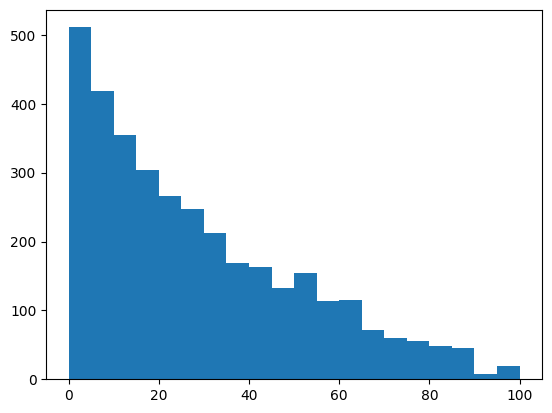

In [8]:
plt.hist(df['grad_100_value'], bins = 20)

<Axes: xlabel='grad_100_value', ylabel='Density'>

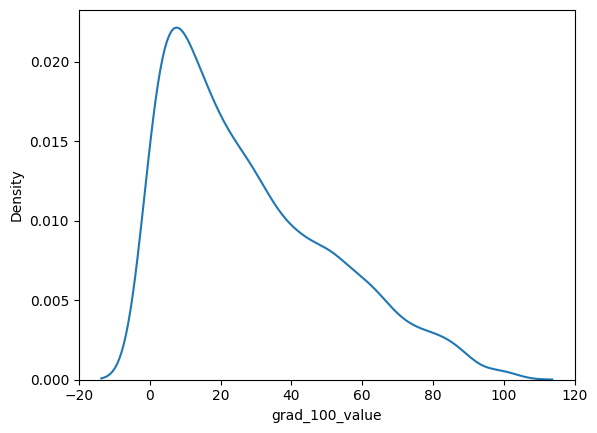

In [9]:
import seaborn as sns

sns.kdeplot(df['grad_100_value'])

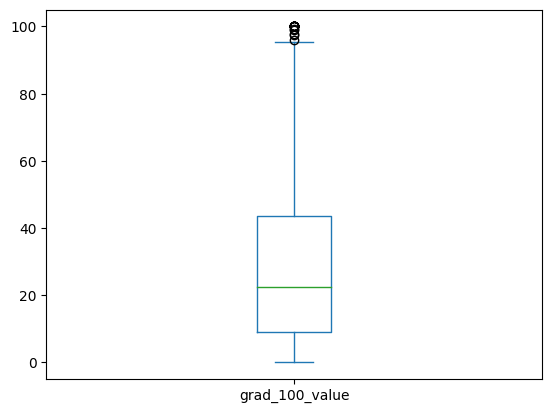

In [10]:
df['grad_100_value'].plot.box()
plt.show()

In [11]:
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


## 1.5

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

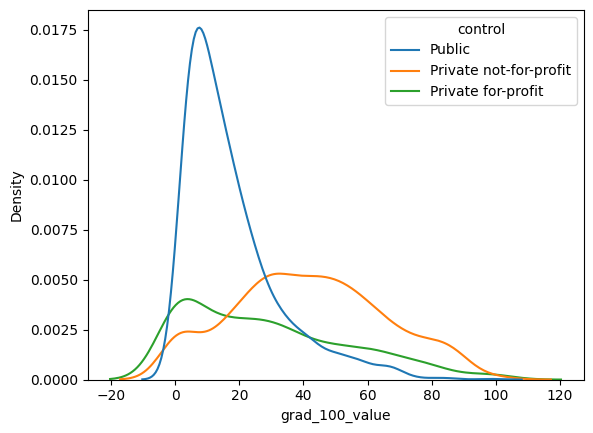

In [12]:
# by control

sns.kdeplot(data=df, x='grad_100_value', hue='control')

Typically, the graduation rate is highest for private not-for-profit schools, followed by private for-profit schools, and then public schools, based on the peaks of the density plots. Furthermore, the plot for private not-for-profit schools is relatively symmetric while the plots for public and private for-profit schools are right skewed, indicating that a few schools drag the mean upwards.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

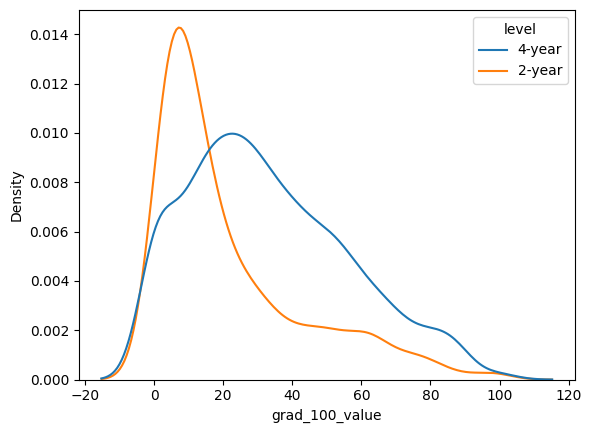

In [13]:
# by level

sns.kdeplot(data=df, x='grad_100_value', hue='level')

Typically, 4-year schools have a higher  graduation rate than 2-year schools, demonstrated by the peak of the 4-year density plot being around 20 while the peak of the 2-year density plot is around 10.

In [14]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [15]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

Based on the data, 4-year colleges have an average graduation rate of 33.2 points which is 11.6 points greater than 2-year colleges which have an average graduation rate of 21.6 points. Furthermore, private not-for-profit have the greatest average graduation rate of 41.7 points, followed by private for-profit at 29.1 points, and then public at 17.4 points. Therefore, 4-year and private not-for-profit institutions have the best graduation rates.

## 1.6

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

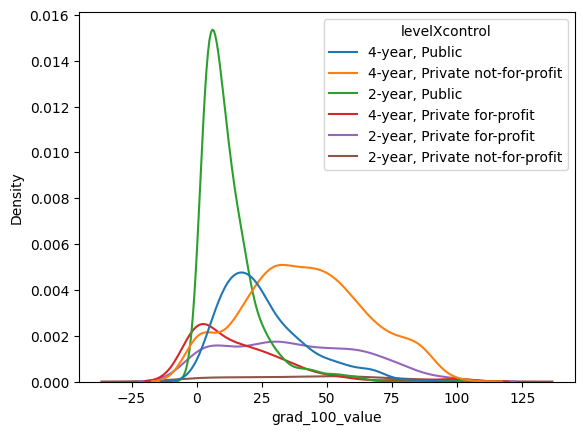

In [16]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')

The institutions with the best graduation rate are 4-year, private not-for-profit institutions which peak around 45 and have high density above this as well. Within groups, there is a lot of variety. For example, 4-year private not-for-profit institutions have much higher graduation rates than 4-year private for-profit schools.

## 1.7

<Axes: xlabel='aid_value', ylabel='Density'>

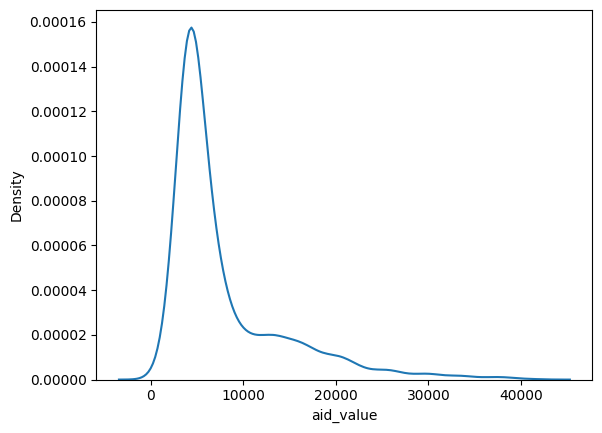

In [17]:
sns.kdeplot(df['aid_value'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

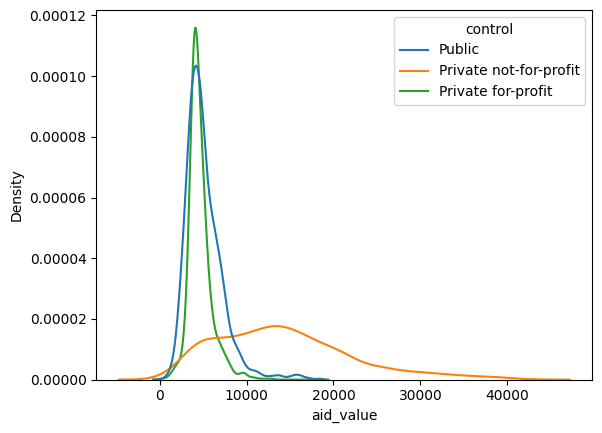

In [18]:
sns.kdeplot(data=df, x='aid_value', hue='control')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

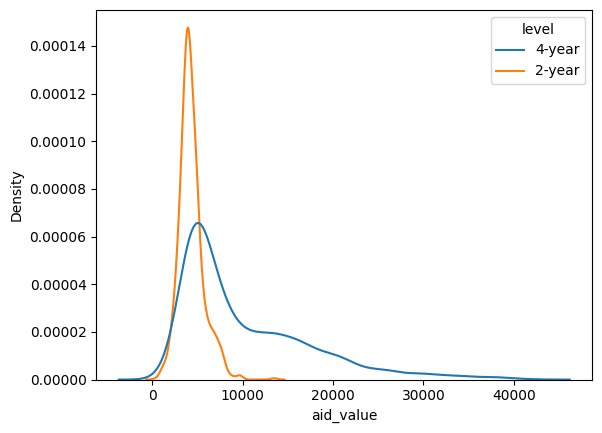

In [19]:
sns.kdeplot(data=df, x='aid_value', hue='level')

In [20]:
df.loc[:, ['control', 'aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [21]:
df.loc[:, ['level', 'aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

The shape of the graph has one major peak around 5000 and then has a smaller peak along the tail on the right around 12000. This can be explained by both public and private for-profit having aid peaking around 5000 while private not-for-profit has aid peaking around 13000. Thus, private not-for-profit institutions give much more aid than public and private for-profit institutions.

## 1.8

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

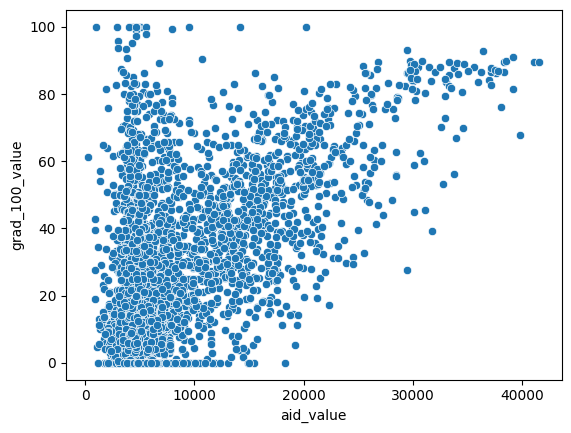

In [22]:
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value')

Generally, as aid value increases, graduation rate increases as well. However, there are some points that do not demonstrate this trend as graduation rate is high even without much aid given.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

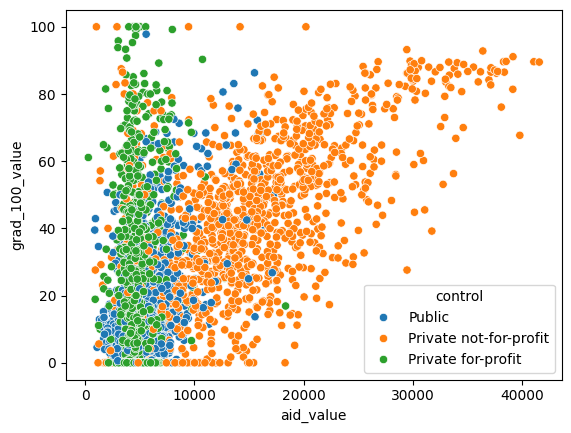

In [23]:
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value', hue = 'control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

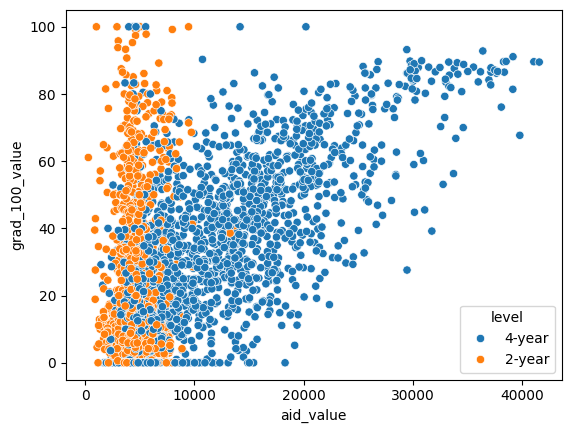

In [24]:
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value', hue = 'level')

Based on the colored plots, it is evident that for 2-year colleges, aid does not play much of a role in graduation rate because aid is consistently relatively low and graduation rates are highly variable. For 4-year colleges, there is more of a positive association where as aid increases, graduation rate increases. Similarly, public and private for-profit institutions do not have much of a relationship between aid and graduation rate. However, private not-for-profit institutions have a positive association between increased aid and a higher graduation rate.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

## 4.1

I chose Medicare monthly enrollment data as of June 2024.
[Link](https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-survey-file)

In [67]:
df = pd.read_csv('Medicare_Monthly_Enrollment_June_2024.csv', low_memory = False)
df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47959444,33147099,14812345,35679758,22661451,13018307,10000861,1030113,409204,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477,711448,210029,...,862992,652965,210026,637247,437749,199498,205496,32790,11452,387510
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323,6484,2840,...,8742,5902,2840,6036,3268,2767,1839,296,105,3796
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033,28775,12258,...,38651,26393,12258,27352,15593,11759,5276,867,379,20830
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847,5036,810,...,5515,4704,810,4170,3410,759,1783,304,73,2009


## 4.2

The data dictionary outlines variable names, the term name, and a description. It does not explicitly describe how missing values are handled for categorical or numerical values since it doesn't outline the potential values that the data can take. For categorical values, it does not describe possible values and missing value codes, only a description of what the variable means. For numeric values, it also does not describe how missing values are handled.

My opinion is that the dictionary provides a comprehensive overview of the variables included with clear definitions. However, it lacks important information regarding how missing data is handled which is important for accurate analysis. It would be beneficial to contain a list of potential values that variables can take to allow for a clearer understanding of the data.

## 4.3

Some interesting variables are:

*   year: to understand how enrollment has changed over time
*   bene_state_desc: to understand how enrollment varies between different states
* total_benes: to understand the total number of beneficiaries
* Dsbld_Tot_Benes: to understand how many beneficiaries are disabled
* Male_Tot_Benes, Female_Tot_Benes: to understand the male and female breakdown



In [68]:
# only look at state level data
df = df[df['BENE_GEO_LVL'] == 'State']

In [69]:
# YEAR

# Check for missing values in 'Year'
print(df['YEAR'].isnull().sum())

# Convert 'Year' to integer if necessary
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').astype('Int64')

0


In [70]:
# BENE_STATE_DESC

# Check for missing values in 'Bene_State_Desc'
print(df['BENE_STATE_DESC'].isnull().sum())

# Normalize state names to title case
df['BENE_STATE_DESC'] = df['BENE_STATE_DESC'].str.title()

0


In [71]:
# TOT_BENES

# Check for missing values
print(df['TOT_BENES'].isnull().sum())

# Convert to integer if necessary
df['TOT_BENES'] = pd.to_numeric(df['TOT_BENES'], errors='coerce').astype('Int64')

0


In [72]:
# DSBLD_TOT_BENES

# Check for missing values
print(df['DSBLD_TOT_BENES'].isnull().sum())

# Convert to integer if necessary
df['DSBLD_TOT_BENES'] = pd.to_numeric(df['DSBLD_TOT_BENES'], errors='coerce').astype('Int64')

0


In [73]:
# MALE_TOT_BENES

# Check for missing values
print(df['MALE_TOT_BENES'].isnull().sum())

# Convert to integer if necessary
df['MALE_TOT_BENES'] = pd.to_numeric(df['MALE_TOT_BENES'], errors='coerce').astype('Int64')

0


In [74]:
# FEMALE_TOT_BENES

# Check for missing values
print(df['FEMALE_TOT_BENES'].isnull().sum())

# Convert to integer if necessary
df['FEMALE_TOT_BENES'] = pd.to_numeric(df['FEMALE_TOT_BENES'], errors='coerce').astype('Int64')

0


## 4.4

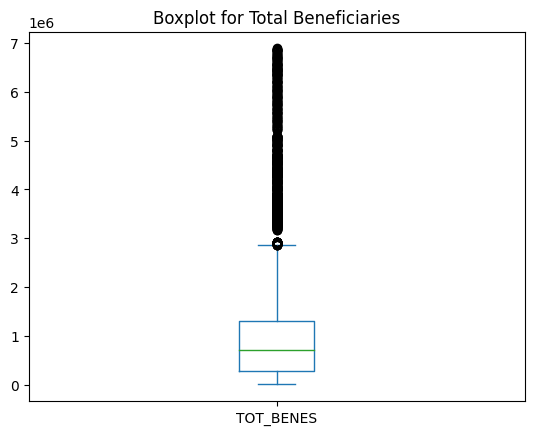

In [75]:
# Boxplot for TOT_BENES
df['TOT_BENES'].plot.box()
plt.title('Boxplot for Total Beneficiaries')
plt.show()

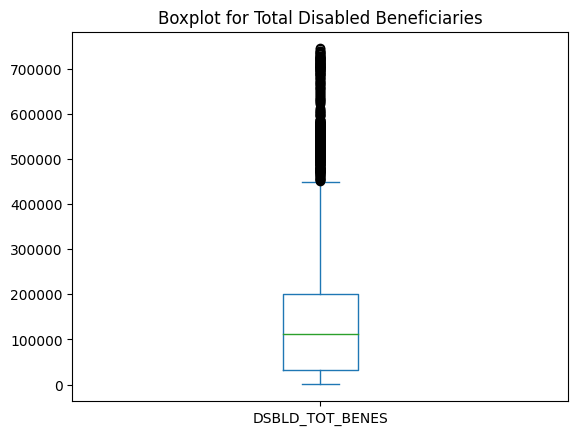

In [76]:
# Boxplot for DSBLD_TOT_BENES
df['DSBLD_TOT_BENES'].plot.box()
plt.title('Boxplot for Total Disabled Beneficiaries')
plt.show()

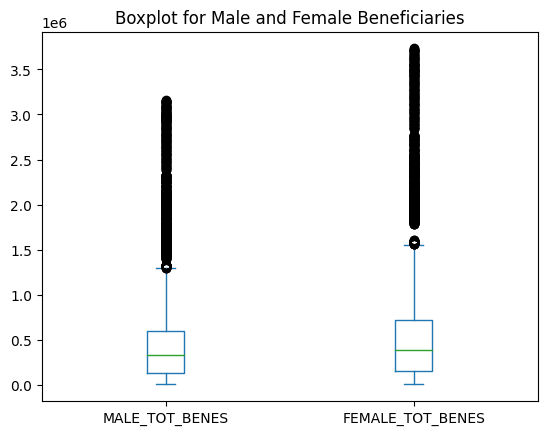

In [77]:
# Boxplot for MALE_TOT_BENES and FEMALE_TOT_BENES
df[['MALE_TOT_BENES', 'FEMALE_TOT_BENES']].plot.box()
plt.title('Boxplot for Male and Female Beneficiaries')
plt.show()

All of these have outliers on the upper end, so a few states have way more beneficiaries than others.

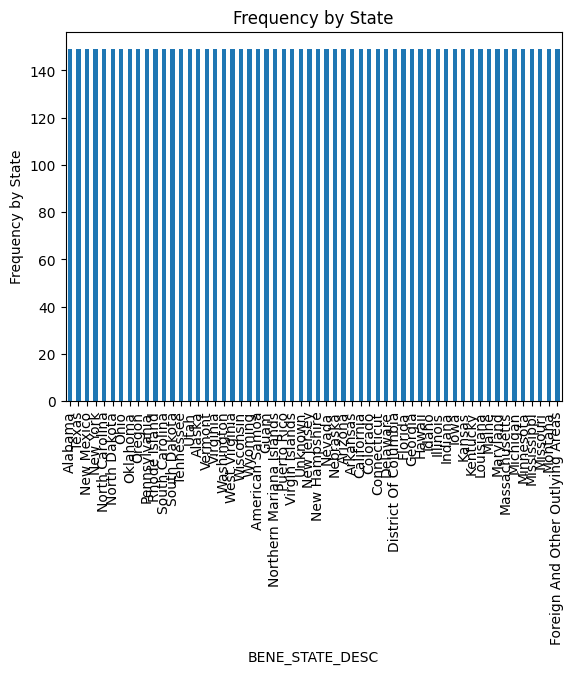

In [79]:
# Bar chart for BENE_STATE_DESC
state_counts = df['BENE_STATE_DESC'].value_counts()
state_counts.plot(kind='bar')
plt.title('Frequency by State')
plt.ylabel('Frequency by State')
plt.show()

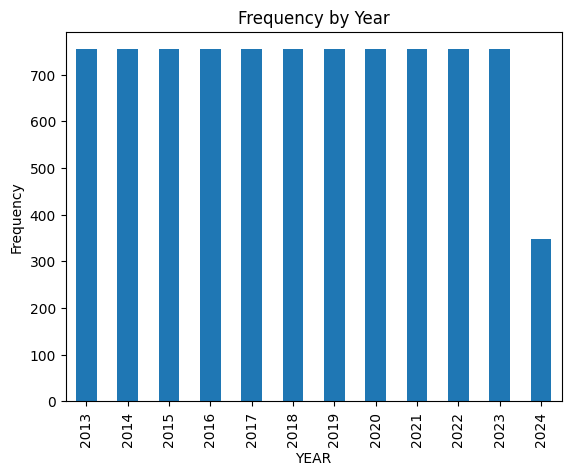

In [84]:
# Bar chart for YEAR
state_counts = df['YEAR'].value_counts()
state_counts.plot(kind='bar')
plt.title('Frequency by Year')
plt.ylabel('Frequency')
plt.show()

## 4.5

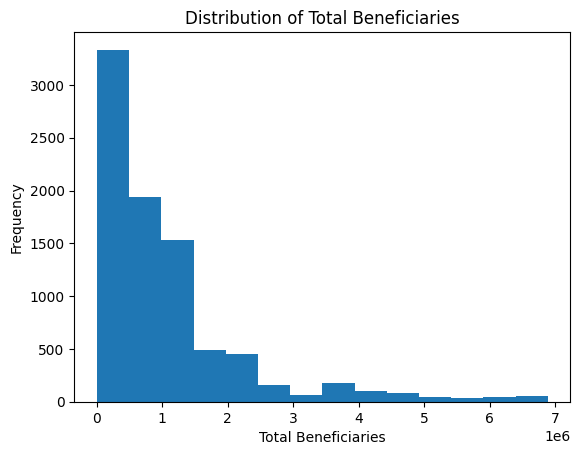

In [82]:
# Histogram of total number of beneficiaries
plt.hist(df['TOT_BENES'], bins = 14)
plt.title('Distribution of Total Beneficiaries')
plt.xlabel('Total Beneficiaries')
plt.ylabel('Frequency')
plt.show()

I see that the total beneficiaries distribution is very right skewed. Most values are lower, but there are a few larger values that drag the mean upwards. Most states have between 0 and 500,000 beneficiaries each month, but a few have much more. This right skewedness indicates that the data could be log transformed in order to better normalize the distribution.

## 4.6

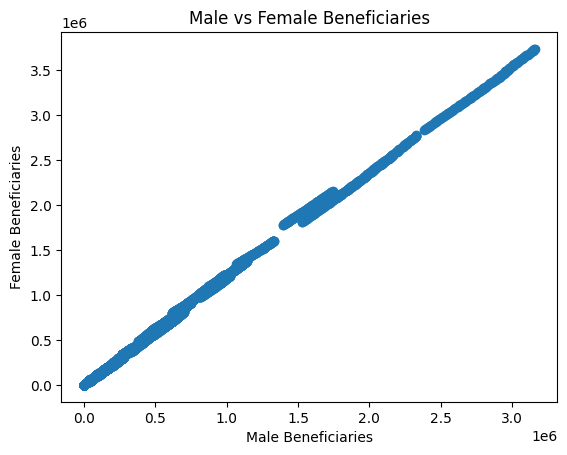

In [83]:
# Scatter plot to compare Male and Female Beneficiaries
plt.scatter(df['MALE_TOT_BENES'], df['FEMALE_TOT_BENES'])
plt.title('Male vs Female Beneficiaries')
plt.xlabel('Male Beneficiaries')
plt.ylabel('Female Beneficiaries')
plt.show()

The scatterplot is very linear, emphasizing that the number of male beneficiaries and the number of female beneficiaries are almost always around the same value. There is a range over which the number of beneficiaries spans, but in all cases, the number of female and male beneficiaries match one another very well.

## 4.7

In [85]:
summary = df[['TOT_BENES', 'DSBLD_TOT_BENES', 'MALE_TOT_BENES', 'FEMALE_TOT_BENES']].describe()
print(summary)

            TOT_BENES  DSBLD_TOT_BENES  MALE_TOT_BENES  FEMALE_TOT_BENES
count          8493.0           8493.0          8493.0            8493.0
mean   1053552.442011    146917.661721   480230.133993     573322.310138
std    1179180.614432    148418.534897    536436.89441     642917.707327
min            1836.0            335.0           998.0             838.0
25%          280990.0          33201.0        131740.0          148915.0
50%          716356.0         111740.0        329624.0          386258.0
75%         1309447.0         200254.0        597755.0          711900.0
max         6890903.0         744636.0       3157473.0         3733430.0


For the total number of beneficiaries, the average is around 1.05M, but the standard deviation is very large, indicating a large spread of data points. Also, the mean is larger than the median, indicating the distribution is right-skewed.

For the number of disabled beneficiaries, the average is around 150K, but once again the standard deviation is large, indicating a wide spread. Furthermore, the mean is larger than the median, so the distribution is also right-skewed.

This same trend follows for male and female total beneficiaries with the large standard deviation and right-skewedness. It is interesting that there are typically more female beneficiaries than male beneficiaries.